# About Yulu Case Study

Yulu is India’s leading ***micro-mobility service provider***, which ***offers unique vehicles for the daily commute***. Starting off as a ***mission to eliminate traffic congestion in India***, Yulu provides the safest commute solution through a ***user-friendly mobile app to enable shared, solo and sustainable commuting.***

***Yulu zones*** are located at all the appropriate locations (including ***metro stations, bus stands, office spaces, residential areas, corporate offices, etc***) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want ***to understand the factors affecting the demand for these shared electric cycles in the Indian market***.

# Problem Statement



__The company is interested in identifying:__
- Which factors are important for predicting the demand for shared electric cycles in the Indian market?
- How effectively these factors explain the demand for electric cycles.

# Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv


Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 20.7MB/s]


In [ ]:
data  = pd.read_csv('bike_sharing.csv')
df = data
data.shape

(10886, 12)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Univariate Analysis

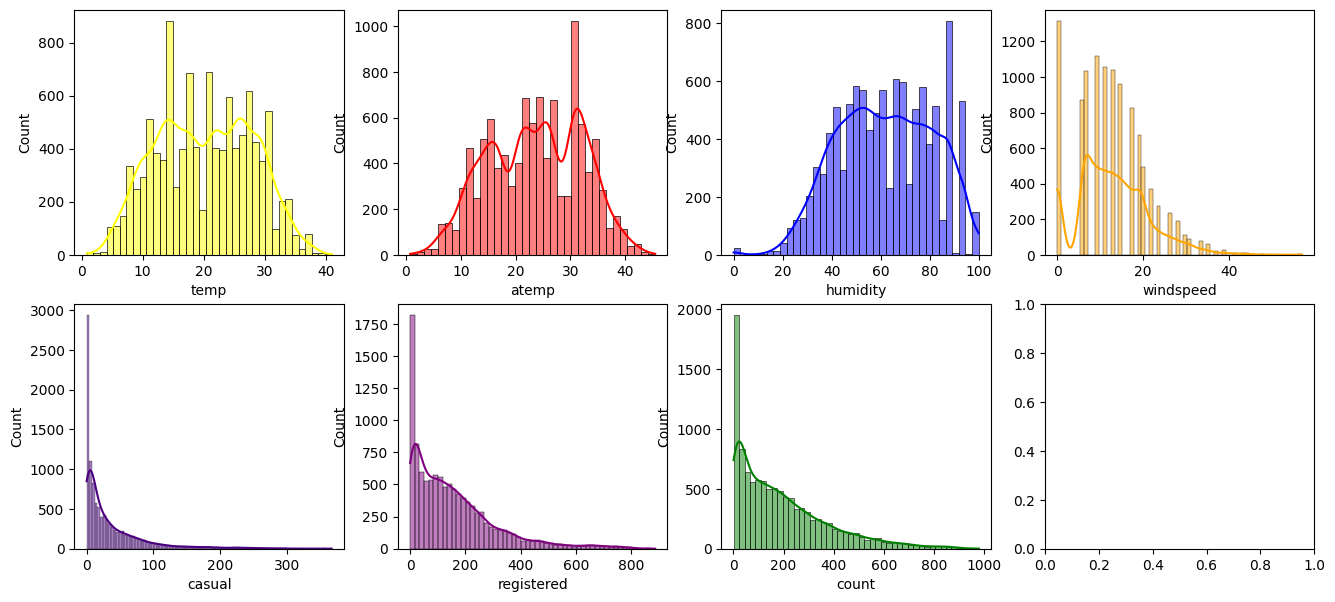

In [ ]:
# understanding the distribution for numerical variables

fig, axis = plt.subplots(nrows=2,ncols=4,figsize=(16,7))
sns.histplot(data['temp'],ax=axis[0,0],color='yellow',kde='true')
sns.histplot(data['atemp'],ax=axis[0,1],color='red',kde='true')
sns.histplot(data['humidity'],ax=axis[0,2],color='blue',kde='true')
sns.histplot(data['windspeed'],ax=axis[0,3],color='orange',kde='true')
sns.histplot(data['casual'],ax=axis[1,0],color='indigo',kde='true')
sns.histplot(data['registered'],ax=axis[1,1],color='purple',kde='true')
sns.histplot(data['count'],ax=axis[1,2],color='green',kde='true')
plt.show()


__Observation__
- More customers tend to rent bikes when the temperature ranges from 10 to 30 degrees Celsius.
- An increase in wind speed results in a decrease in the number of customers.
- The number of customers, whether casual or registered, decreases logarithmically.

#Bivariate Analysis

In [ ]:
df['Season'] = df['season'].map({
    1: "Spring",
    2: "Summer",
    3: "Autumn/Fall",
    4: "Winter"
})
df['WorkingDays'] = df['workingday'].map({
    1:"Working Day",
    0:"Non-Working Day"
})

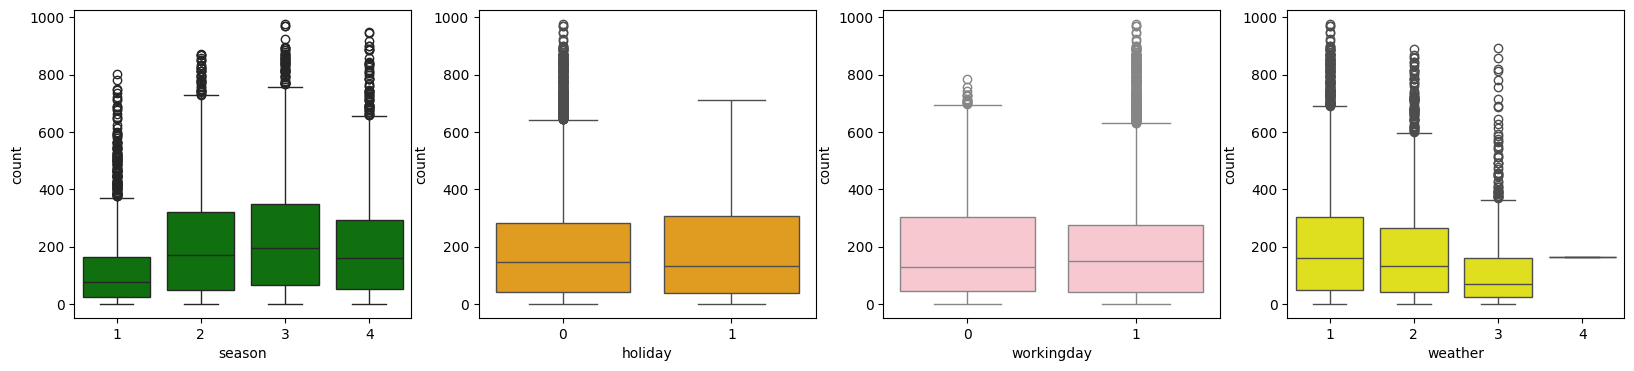

In [ ]:
fig, axis = plt.subplots(nrows=1,ncols=4,figsize=(20,4))
sns.boxplot(data=data,x='season',y='count',ax=axis[0],color='green')
sns.boxplot(data=data,x='holiday',y='count',ax=axis[1],color='orange')
sns.boxplot(data=data,x='workingday',y='count',ax=axis[2],color='pink')
sns.boxplot(data=data,x='weather',y='count',ax=axis[3],color='yellow')
plt.show()

<Axes: xlabel='humidity', ylabel='registered'>

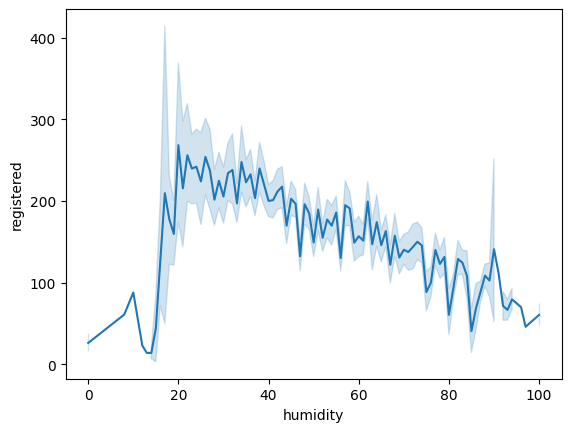

In [ ]:
sns.lineplot(data = df, x = "humidity", y= "registered")

__Observation__
- Registered Customers are more than 200 in numbers when the humidity is between 20 - 40 , then it gradually decreases as the humidity increases .

<Axes: xlabel='humidity', ylabel='casual'>

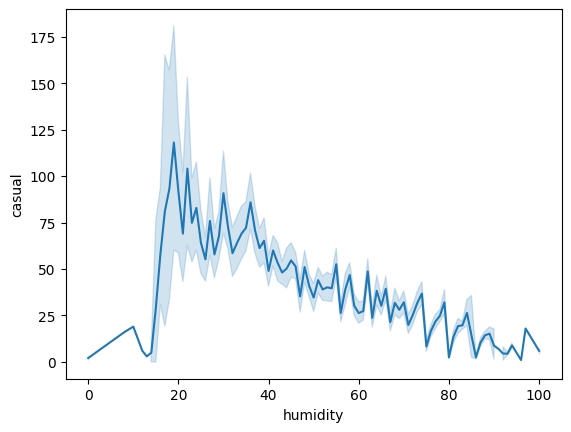

In [ ]:

sns.lineplot(data = df, x = "humidity", y= "casual")

__Observation__
- Casual Customers are between 50 - 125 in numbers when the humidity is between 20 - 40 , then it  decreases rapidly as the humidity increases .

<Axes: xlabel='Season', ylabel='atemp'>

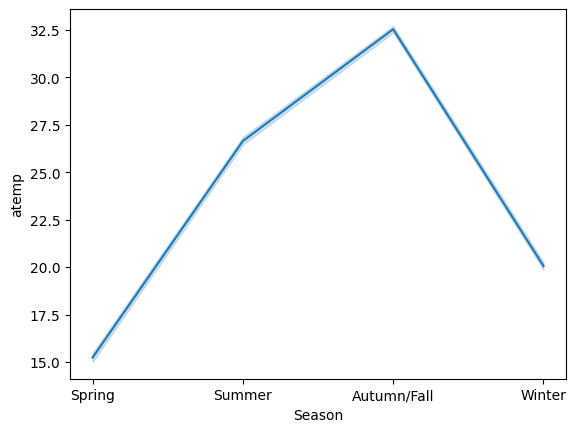

In [ ]:
sns.lineplot(data = df, x = "Season", y= "atemp")

<Axes: xlabel='windspeed', ylabel='registered'>

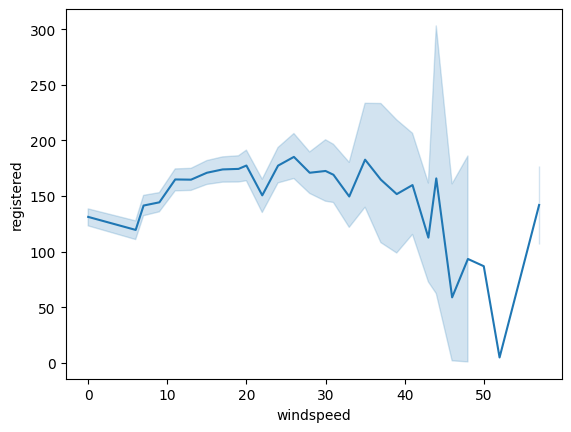

In [ ]:
sns.lineplot(x='windspeed', y='registered', data=df)

<Axes: xlabel='windspeed', ylabel='casual'>

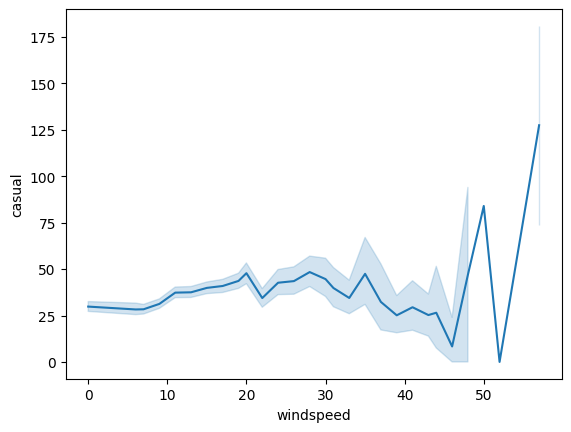

In [ ]:
sns.lineplot(x='windspeed', y='casual', data=df)

<Axes: xlabel='humidity', ylabel='count'>

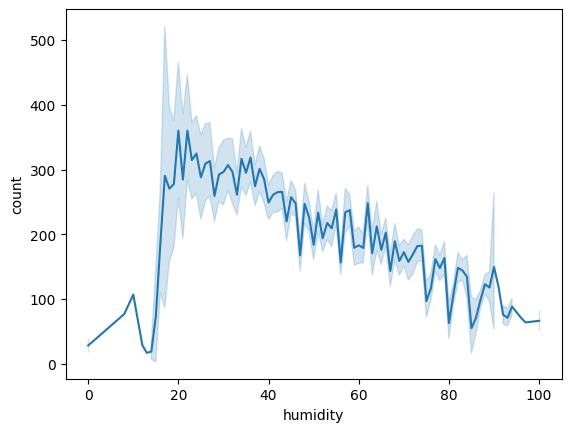

In [ ]:
sns.lineplot(data = df, x = "humidity", y= "count")

<Axes: xlabel='Season', ylabel='count'>

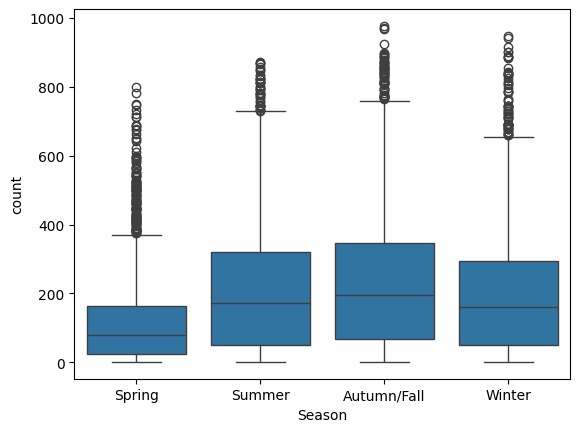

In [ ]:
sns.boxplot(x='Season', y='count', data=df)

__Observation__

- The count of customers is comparatively more in Summers ans Autumn/Fall.
- The count of customers is less in Spring.

<Axes: xlabel='Season', ylabel='casual'>

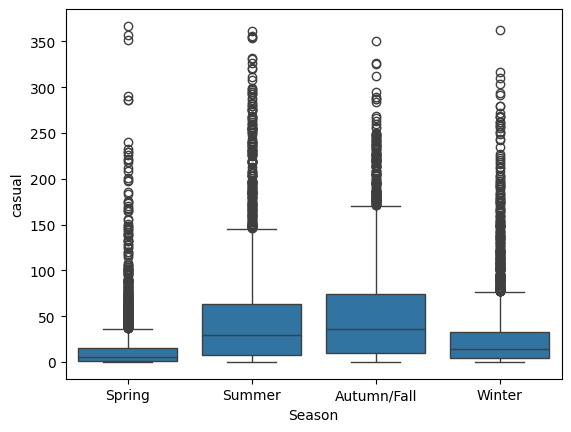

In [ ]:

sns.boxplot(x='Season', y='casual', data=df)

<Axes: xlabel='Season', ylabel='registered'>

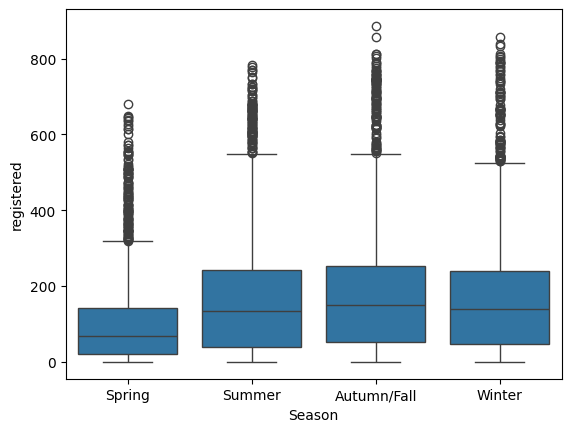

In [ ]:
sns.boxplot(x='Season', y='registered', data=df)

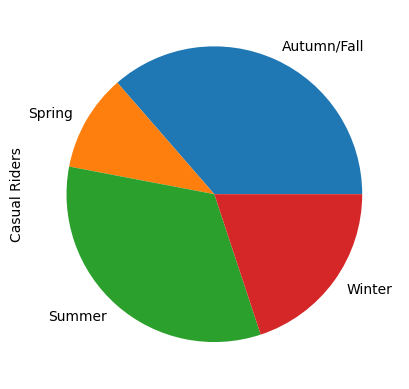

In [ ]:
data.groupby('Season')['casual'].sum().plot(kind='pie')
_ = plt.ylabel('Casual Riders')

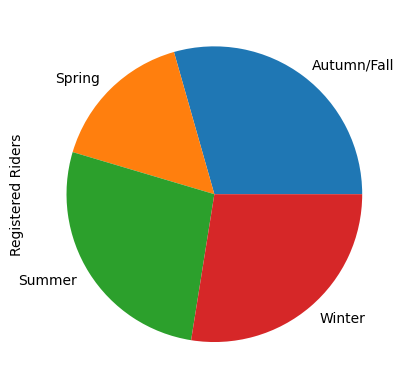

In [ ]:
data.groupby('Season')['registered'].sum().plot(kind='pie')
_ = plt.ylabel('Registered Riders')

<Axes: xlabel='Season', ylabel='count'>

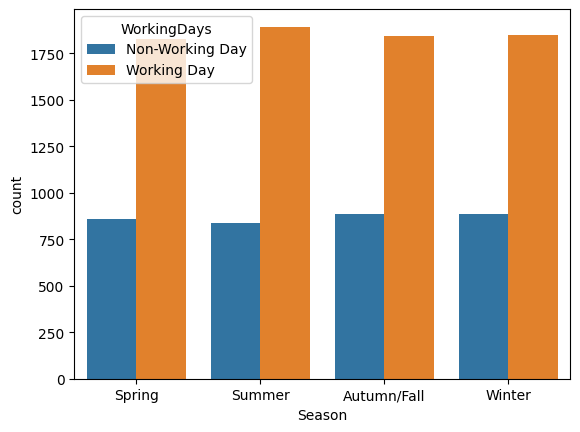

In [ ]:
sns.countplot(data = df, x = "Season", hue = "WorkingDays")


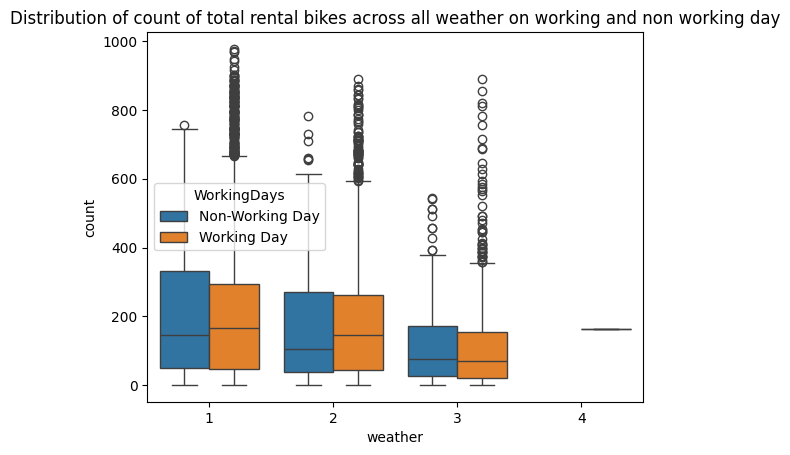

In [ ]:
# Data of count of rental bikes in all weather condition in working and non working days.
plt.title('Distribution of count of total rental bikes across all weather on working and non working day')
sns.boxplot(data = data, x = 'weather', y = 'count', hue = 'WorkingDays')
plt.show()

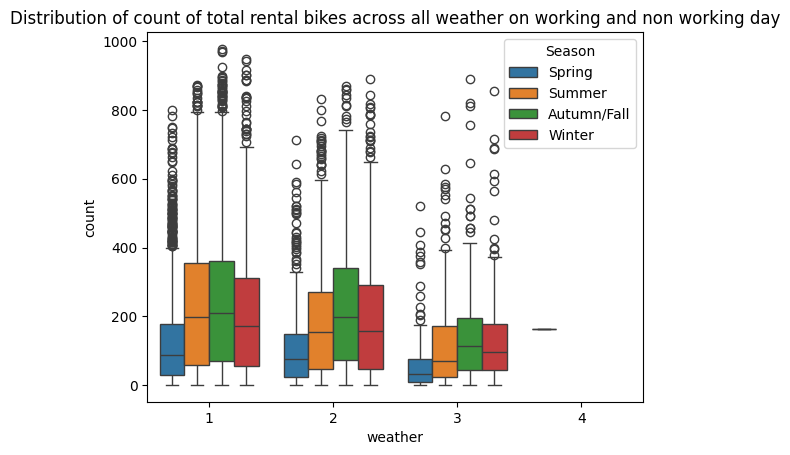

In [ ]:
# Data of count of rental bikes in all weather condition in working and non working days.
plt.title('Distribution of count of total rental bikes across all weather on working and non working day')
sns.boxplot(data = data, x = 'weather', y = 'count', hue = 'Season')
plt.show()

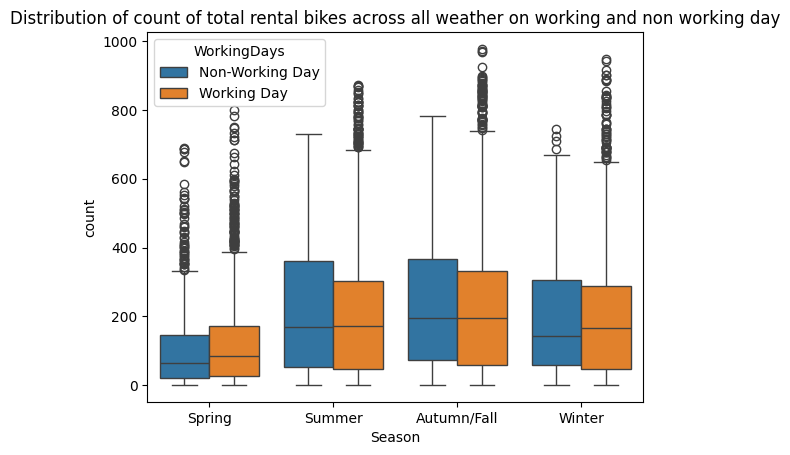

In [ ]:
# Data of count of rental bikes in all weather condition in working and non working days.
plt.title('Distribution of count of total rental bikes across all weather on working and non working day')
sns.boxplot(data = data, x = 'Season', y = 'count', hue = 'WorkingDays')
plt.show()

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Winter
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Winter
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Winter
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Winter


#Statistical Analysis

In [ ]:
casual_counts = df['casual'].value_counts()
registered_counts = df['registered'].value_counts()

casual_counts

casual
0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: count, Length: 309, dtype: int64

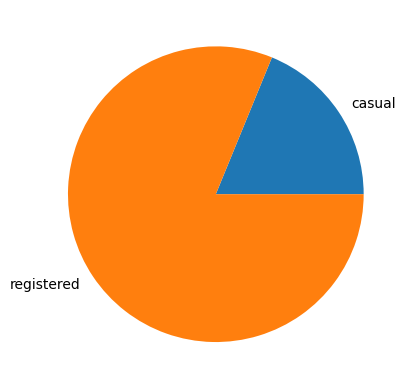

Casual: 392135
Registered: 1693341


In [ ]:
casual_counts = df['casual'].sum()
registered_counts = df['registered'].sum()

array = np.array([casual_counts, registered_counts])

# Plotting pie chart
plt.pie(array, labels=['casual', 'registered'])
plt.show()
print("Casual:", casual_counts)
print("Registered:", registered_counts)

In [ ]:

# Create labels for the bins
bins = [0, 15, 30, 46]
labels = ['0-15', '15-30', '30-46']

# Discretize 'temp' column into bins
df['temp_bins'] = pd.cut(df['atemp'], bins=bins, labels=labels, right=False)

# Sum counts of 'casual' and 'registered' within each bin
sum_counts = df.groupby('temp_bins')[['casual', 'registered']].sum()

# Display the sum of counts within each temperature bin
print(sum_counts)

           casual  registered
temp_bins                    
0-15        12884      162217
15-30      150948      811504
30-46      228303      719620


In [ ]:
#H0 : Temperature and count of user are independent
#H1 : Temperature and count of users are not independent

from scipy.stats import chi2_contingency

observed = [[12884,162217],
            [150948,811504],
            [228303,719620]]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed)

print("Chi-square Statistic:", chi_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", df)
print("Expected Frequencies:")
print(exp_freq)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Temperature and count of users are not independent ")
else:
    print("Fail to reject H0")
    print("Temperature and count of user are independent")

Chi-square Statistic: 38475.58164679177
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[ 32924.48852684 142176.51147316]
 [180971.2099396  781480.7900604 ]
 [178239.30153356 769683.69846644]]
Reject H0
Temperature and count of users are not independent 


## Does working Day has effect on number of electric cycles rented ?

In [ ]:
data.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


### Observation
- The count of working days is double compared to non-workingdays.
- The Standard deviation of working days is also higher.


[]

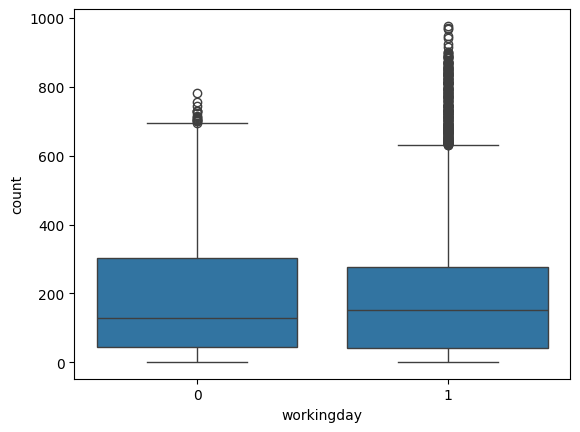

In [ ]:
sns.boxplot(data = data, x = 'workingday', y = 'count') # ploting the boxplot for workind and non working day count
plt.plot()

<Axes: xlabel='WorkingDay', ylabel='count'>

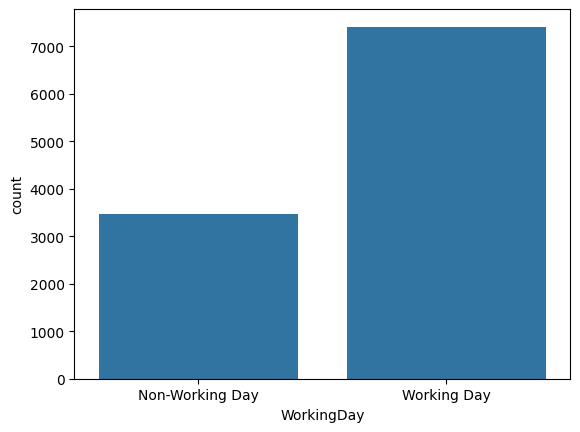

In [ ]:
sns.countplot(data = df, x = "WorkingDay")

***STEP-1*** : Set up Null Hypothesis ( H0 )

---



  * **Null Hypothesis ( H0 )** - working day does not have any effect on number of electric cycles rented

  * **Alternate Hypothesis ( H1 )** -working day has effect on number of electric cycles rented

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Test for Normal Distribution.
* Distribution check using **QQ Plot**
* Shapiro test for normal distribution



***STEP-3***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-4***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Can't reject H0
  2.   **p-val < alpha** : Reject H0

### Test for Normal Distrubution

[]

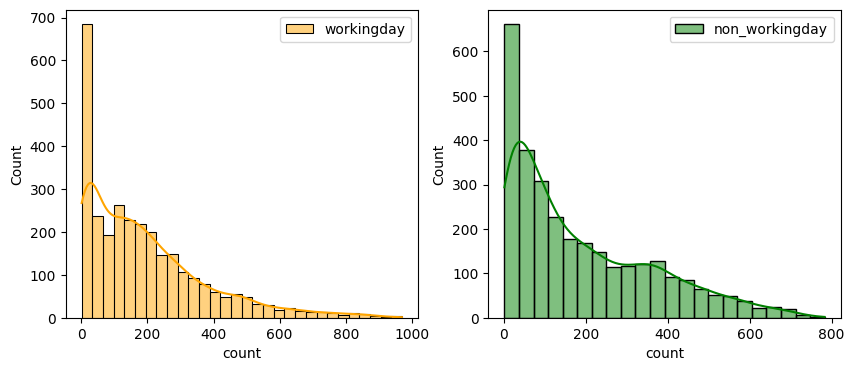

In [ ]:
# Histplot to see if data has the normal Distribution
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data.loc[data['workingday'] == 1, 'count'].sample(3000), color = 'orange', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(data.loc[data['workingday'] == 0, 'count'].sample(3000), color = 'green', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

### Observation
- The Plot doesn't seem to have Normal Distribution

### QQ Plot for the conformation of Normal Distribution

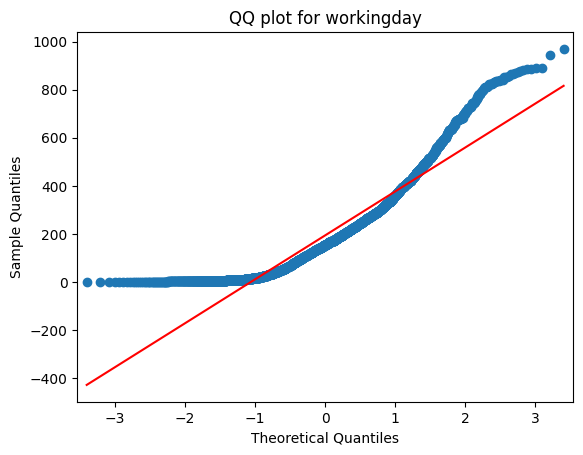

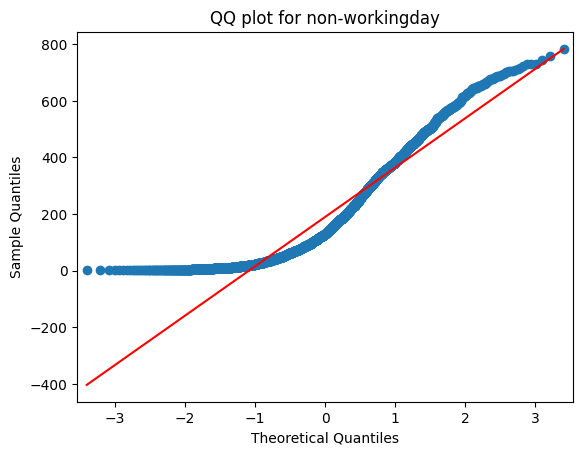

In [ ]:
from statsmodels.graphics.gofplots import qqplot

# QQ plot to check the normal distribution
qqplot(data.loc[data['workingday'] == 1, 'count'].sample(3000),line='s')
plt.title('QQ plot for workingday')

qqplot(data.loc[data['workingday'] == 0, 'count'].sample(3000),line='s')
plt.title('QQ plot for non-workingday')
plt.show()

__Observation:__
* It can be concluded that this is not a normal distribution.


**Assumptions of ANNOVA has failed , it's not a normal distribution**

**We will perform Krushkal Wallis Test to check for our hypothesis**

In [ ]:
from scipy.stats import kruskal


stat, p_value = kruskal(data.loc[data['workingday'] == 1, 'count'].sample(3000),data.loc[data['workingday'] == 0, 'count'].sample(3000))
if p_value < 0.05 :
  print ("Reject the null hypothesis . So, working day has effect on number of electric cycles rented ")
else :
  print ("Accept the null hypothesis. So ,working day has no effect on number of electric cycles rented ")


Accept the null hypothesis. So ,working day has no effect on number of electric cycles rented 


### Is the number of electric cycles rented is similar or different in different season ?

In [ ]:
data.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


# Observation
- The count of rented electric cycles are approx or same numbers.

<Axes: xlabel='Season', ylabel='count'>

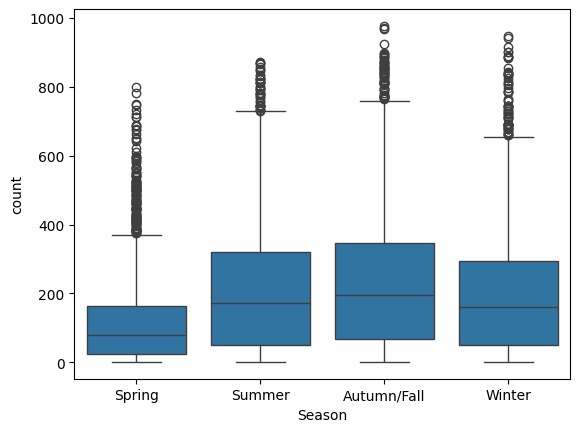

In [ ]:
sns.boxplot(data=data,x='Season',y='count')

***STEP-1*** : Set up Null Hypothesis ( H0 )

---
* **Null Hypothesis ( H0 )** - Mean of electric cycle rented is same for season
Spring, Summer, Fall/Autumn, Winter.

* **Alternate Hypothesis ( HA )** - Mean of electric cycle rented is not same for season Spring, Summer, Fall/Autumn, Winter.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Shapiro test for normal distribution



***STEP-3*** : Compute the p-value and fix value of alpha.

---

We will be computing the multiple sample anova-test p-value using the **f_oneway** function using scipy.stats.
We set our alpha to be **0.05**

***STEP-4*** : Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

### Visual Observation for Normal Distribution

[]

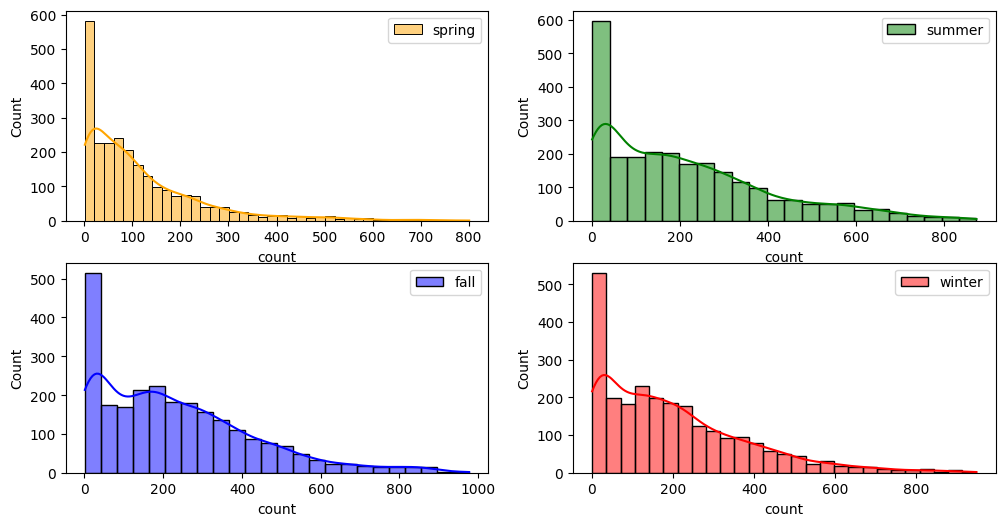

In [ ]:
# Histplot to see if data has the normal Distribution

plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data.loc[data['season'] == 1, 'count'].sample(2500), color = 'orange', kde=True, label = 'spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(data.loc[data['season'] == 2, 'count'].sample(2500),color = 'green',kde=True,  label = 'summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(data.loc[data['season'] == 3, 'count'].sample(2500),color = 'blue',kde=True,  label = 'fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(data.loc[data['season'] == 4, 'count'].sample(2500),color = 'red',kde=True,  label = 'winter')
plt.legend()
plt.plot()

#### Observation:
The Graphs of the seasons Spring , Summer , Autumn/Fall, Winter  does not seem to be Normal rather skewed .

### Shapiro test for normal distribution

H0 : **This hypothesis follows normal distribution**

H1 : **This hypothesis does not follow normal distribution**

alpha = 0.05

In [ ]:
#Shapiro test for checking the normal distribution
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['season'] == 1, 'count'].sample(2000))
if p_value < 0.05:
  print("Reject the null hypothesis ,Season Spring graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , Season Spring graph  follows normal distribution")

Reject the null hypothesis ,Season Spring graph does not follows normal distribution


In [ ]:
#Shapiro test for checking the normal distribution
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['season'] == 2, 'count'].sample(2000))
if p_value < 0.05:
  print("Reject the null hypothesis ,Season Summer graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , Season Summer graph  follows normal distribution")

Reject the null hypothesis ,Season Summer graph does not follows normal distribution


In [ ]:
#Shapiro test for checking the normal distribution
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['season'] == 3, 'count'].sample(2000))
if p_value < 0.05:
  print("Reject the null hypothesis ,Season Fall/Autumn graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , Season Fall/Autumn graph  follows normal distribution")

Reject the null hypothesis ,Season Fall/Autumn graph does not follows normal distribution


In [ ]:
#Shapiro test for checking the normal distribution
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['season'] == 4, 'count'].sample(2000))
if p_value < 0.05:
  print("Reject the null hypothesis ,Season Winter graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis , Season Winter graph  follows normal distribution")

Reject the null hypothesis ,Season Winter graph does not follows normal distribution


### QQ Plot for conformation of the Assumption of Normal Distrubution

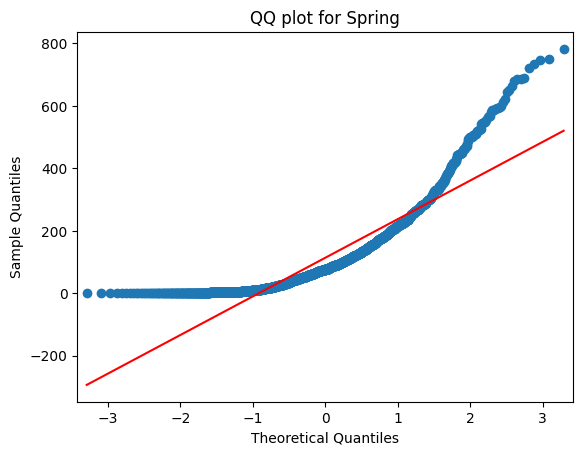

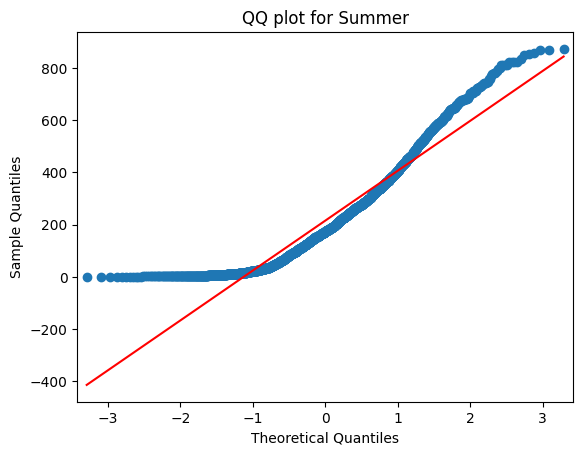

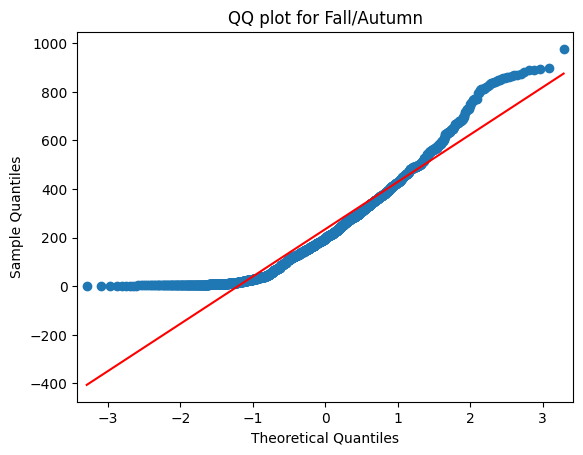

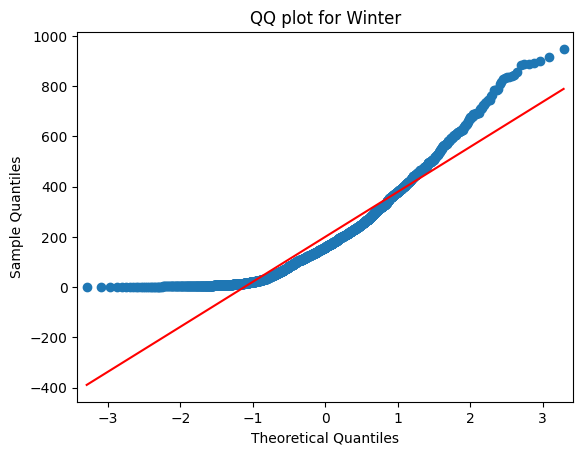

In [ ]:
# QQ plot to check the normal distribution
qqplot(data.loc[data['season'] == 1, 'count'].sample(2000),line='s')
plt.title('QQ plot for Spring')

qqplot(data.loc[data['season'] == 2, 'count'].sample(2000),line='s')
plt.title('QQ plot for Summer')

qqplot(data.loc[data['season'] == 3, 'count'].sample(2000),line='s')
plt.title('QQ plot for Fall/Autumn')

qqplot(data.loc[data['season'] == 4, 'count'].sample(2000),line='s')
plt.title('QQ plot for Winter')
plt.show()

#### Conclusion on Distribution

* This is also not a normal distribution so we will perform krushkal wallis test .

#### Kruskals Walli's Test

In [ ]:
# Applying krushkal wallis test to test the hypothesis
spring =data.loc[data['season'] == 1, 'count'].sample(2000)
summer = data.loc[data['season'] == 2, 'count'].sample(2000)
fall =  data.loc[data['season'] == 3, 'count'].sample(2000)
winter =  data.loc[data['season'] == 4, 'count'].sample(2000)

stat, p_value = kruskal(spring,summer,fall,winter)
if p_value < 0.05 :
  print ("Reject the null hypothesis . So, Seasons has some effect on the number of bikes rented ")
else :
  print ("Accept the null hypothesis. So , Seasons has no effect on the number of bikes rented ")


Reject the null hypothesis . So, Seasons has some effect on the number of bikes rented 


#### **ANNOVA Test**

In [ ]:
from scipy.stats import f_oneway

## Applying ANNOVA to test the hypothesis

f_stats, p_value = f_oneway(spring, summer, fall, winter)
print("F-statistic:", f_stats)
print("P-value:", p_value)
if(p_value<0.05):
  print("Reject the null hypothesis .So, season has some effect on the number of bikes rented")
else:
  print("Accept the null hypothesis .So, season has no effect on the number of bikes rented")

F-statistic: 184.4086592236274
P-value: 1.2640104007356139e-115
Reject the null hypothesis .So, season has some effect on the number of bikes rented


__Conclusion__

- In both the test we can see that we get to reject the null hypothesis . So we can conclude that there's a significantly different in different seasons.

## Is the number of electric cycles rented is similar or different in different season ?

In [ ]:
data.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


__Since there is only case of Bad Weather , So we will ignore in our tests.__





***STEP-1*** : Set up Null Hypothesis ( H0 )


* **Null Hypothesis ( H0 )** - Mean of eletric cycles rented is same for weather 1,2,3 and 4.

* **Alternate Hypothesis ( HA )** - Mean of eletric cycles rented is different for weather 1,2,3 and 4.
---
***STEP-2*** : Checking for basic assumpitons for the hypothesis


* Distribution check using **QQ Plot**
* Visual test for normal distribution.
* Shapiro test for normal distribution

---

***STEP-3*** : Compute the p-value and fix value of alpha.



We will be computing the multiple sample anova-test p-value using the **f_oneway** function using scipy.stats.
We set our alpha to be **0.05**

---
***STEP-4*** : Compare p-value and alpha.


Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

---

### Visual Test for Observation

[]

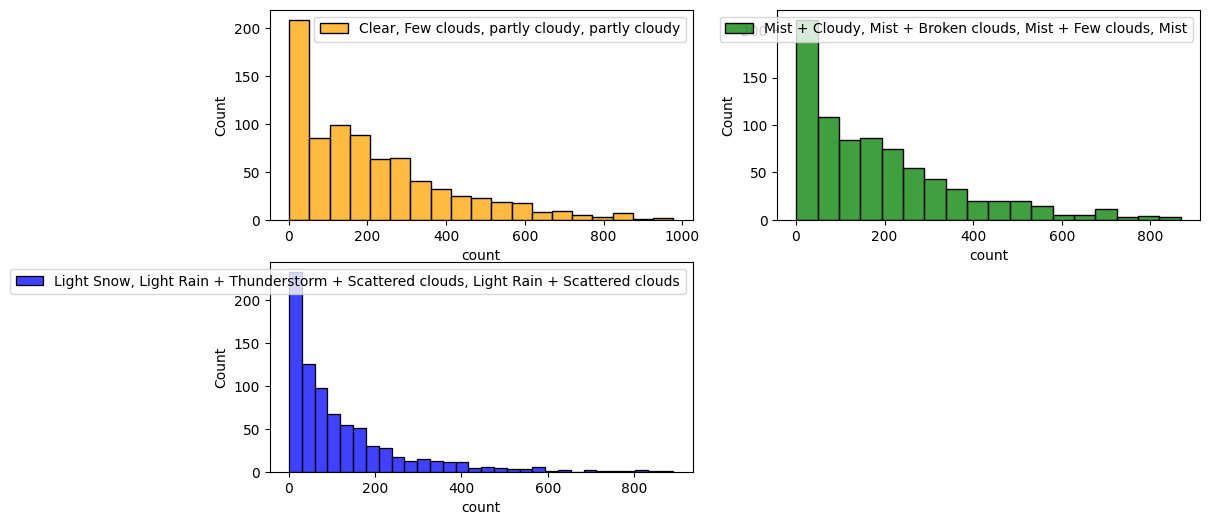

In [ ]:
# Histplot to see if data has the normal Distribution

plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data.loc[data['weather'] == 1, 'count'].sample(800), color = 'orange', label = 'Clear, Few clouds, partly cloudy, partly cloudy')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(data.loc[data['weather'] == 2, 'count'].sample(800),color = 'green',  label = 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(data.loc[data['weather'] == 3, 'count'].sample(800),color = 'blue',  label = 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds')
plt.legend()

plt.plot()

__Observation:__
* Doesn't seem to be a normal graph


* To Check we will do Shapiro Test

### Shapiro Test

H0 : **The above graphs follows normal distribution**

H1 : **The above graphs does not follow normal distribution**

alpha = 0.05

In [ ]:
#Shapiro test for checking the normal distribution
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['weather'] == 1, 'count'].sample(800))


if p_value < 0.05:
  print("Reject the null hypothesis , Weather 1 graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis ,Weather 1 graph follows normal distribution")

Reject the null hypothesis , Weather 1 graph does not follows normal distribution


In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['weather'] == 2, 'count'].sample(800))


if p_value < 0.05:
  print("Reject the null hypothesis , Weather 2 graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis ,Weather 2  graph follows normal distribution")

Reject the null hypothesis , Weather 2 graph does not follows normal distribution


In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(data.loc[data['weather'] == 3, 'count'].sample(800))
if p_value < 0.05:
  print("Reject the null hypothesis ,Weather 3 graph does not follows normal distribution")
else :
  print("Can't reject the null hypothesis ,Weather 3  graph follows normal distribution")

Reject the null hypothesis ,Weather 3 graph does not follows normal distribution


- For conformation of the normal distribution we will do the QQ Plot

### QQ plot Test

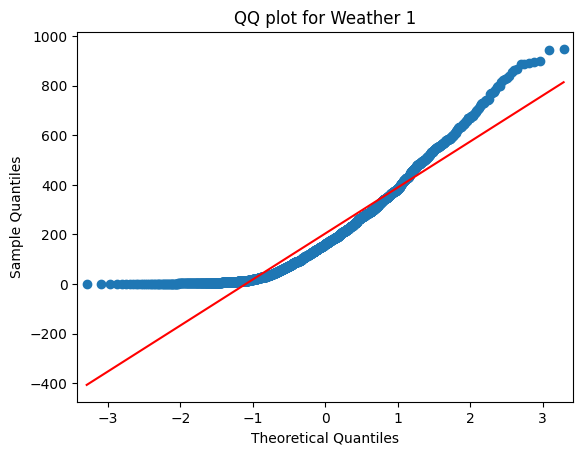

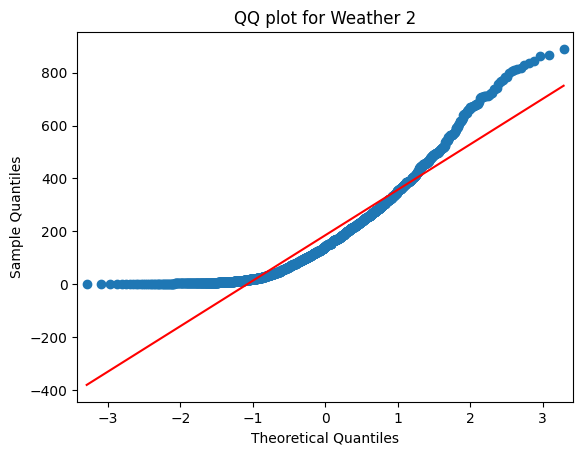

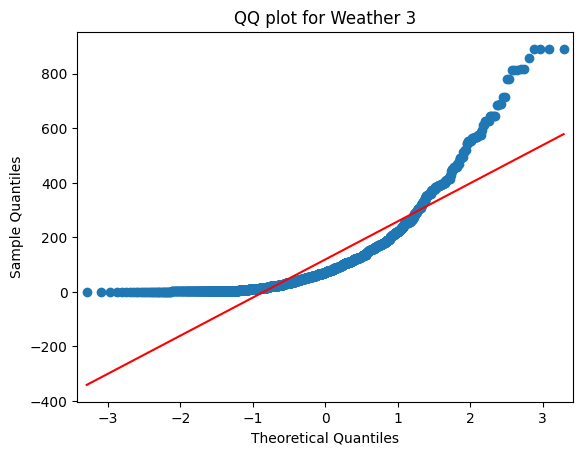

In [ ]:
# QQ plot to check the normal distribution
qqplot(data.loc[data['weather'] == 1, 'count'].sample(2000),line='s')
plt.title('QQ plot for Weather 1')

qqplot(data.loc[data['weather'] == 2, 'count'].sample(2000),line='s')
plt.title('QQ plot for Weather 2')


qqplot(data.loc[data['weather'] == 3, 'count'].sample(2000, replace=True), line='s')
plt.title('QQ plot for Weather 3')



plt.show()

#### Conclusion on Distribution
__We can conclude that distribution is not normal Distribution__
- lets first perform krushkal wallis test and then perform ANNOVA test

### Krushkal Test

In [ ]:
# Applying krushkal wallis test to test the hypothesis
good_weather =data.loc[data['weather'] == 1, 'count'].sample(800)
not_good_weather = data.loc[data['weather'] == 2, 'count'].sample(800)
bad_weather =  data.loc[data['weather'] == 3, 'count'].sample(800)


stat, p_value = kruskal(good_weather,not_good_weather,bad_weather)
if p_value < 0.05 :
  print ("Reject the null hypothesis . Weather has some effect on the number of electric cycles rented ")
else :
  print ("Accept the null hypothesis. So , Weather has no effect on the number of electric cycles rented ")


Reject the null hypothesis . So, working Day has some effect on the number of bikes rented 


### ANNOVA Test

In [ ]:
## Applying AANOVA to test the hypothesis

from scipy.stats import f_oneway
f_stats, p_value = f_oneway(good_weather, not_good_weather, bad_weather)
print("F-statistic:", f_stats)
print("P-value:", p_value)
if(p_value<0.05):
  print("Reject the null hypothesis .So, weather has some effect on the number of bikes rented")
else:
  print("Accept the null hypothesis .So, weather has no effect on the number of bikes rented")

F-statistic: 58.86237353585739
P-value: 1.1074591024480193e-25
Reject the null hypothesis .So, weather has some effect on the number of bikes rented


### Conclusion
__In both the test we can see that we get to reject the null hypothesis.So we can conclude that there's a significantly difference in electric cycles  rent in different weather conditions.__

##Is weather dependent on the season ?

In [ ]:
data[['weather', 'season']].describe()

,weather,season
count,10886.000000,10886.000000
mean,1.418427,2.506614
std,0.633839,1.116174
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,4.000000
max,4.000000,4.000000


***STEP-1*** : Set up Null Hypothesis ( H0 )

* **Null Hypothesis ( H0 )** - Weather is not dependent of Season.

* **Alternate Hypothesis ( HA )** - Weather is dependent of Season.

---

***STEP-2*** : Defining Test Stats -


* Since both are categorical data, so we will perform *Chi-Square test*

---



***STEP-3*** : Compute the p-value and fix value of alpha.



We will be using the chi2_contigency function using scipy.stats.
We set our alpha to be **0.05**

---

***STEP-4*** : Compare p-value and alpha.


Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

---



- Since it is a catgorical data we don't need to perform above tests, we will perform chi- square test.

In [ ]:
# Creating the cross tab
cross_table = pd.crosstab(index = data['season'],
                          columns = data['weather'],
                          values = data['count'],
                          aggfunc = np.sum)
cross_table

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,NaN
3,470116.0,139386.0,31160.0,NaN
4,356588.0,157191.0,30255.0,NaN


In [ ]:
cross_table = pd.crosstab(index = data['season'],
                          columns = data.loc[data['weather'] != 4, 'weather'],
                          values = data['count'],
                          aggfunc = np.sum)
cross_table

weather,1,2,3
season,,,
1,223009,76406,12919
2,426350,134177,27755
3,470116,139386,31160
4,356588,157191,30255


- Since we didn't had enough data in the 4th column, therfore we opted it.

### Chi-Square Test

In [ ]:
# ## Applying Chi-Square to test the hypothesis

from scipy.stats import chi2_contingency
chi_test_stat, pvalue, dof, expected = chi2_contingency(cross_table)
if(pvalue<0.05):
  print("We Reject the null hypothesis ,there is a dependency of weather on season")
else:
  print("We Accept the null hypothesis ,there is no dependency of weather on season")

We Reject the null hypothesis ,there is a dependency of weather on season


### Conclusion

The number of electic cycles rented depend on the weather of the season.

# Conclusions

- Electric cycle rentals are most popular during clear or cloudy weather, and less so during misty or rainy conditions, with limited data on extreme weather.
- Weekdays and weekends show similar average numbers of electric cycle rentals.
- The number of electric cycle rentals is significantly influenced by both the weather and the season.
- Specific weather types (e.g., sunny, cloudy, rainy) do not seem to be influenced by the season (e.g., spring, summer, fall).
- However, when considering the entire year, electric cycle rental numbers vary significantly across different seasons.-

#Recommendations

- Improve data collection for extreme weather to better prepare for severe conditions.
- Adjust pricing based on the time of day: offer lower rates during quieter hours and higher rates during busy times to manage demand.
- Tailor marketing efforts for the popular spring and summer months, offering discounts to attract more customers.
- Provide discounts during favorable weather to encourage more rentals.
- Implement a loyalty program to reward regular users and ensure a smooth experience for new customers.
- Encourage customer feedback to enhance services and meet their expectations.
- Utilize social media platforms for marketing and customer engagement.
- Offer special discounts on occasions like environmental awareness days to promote bike rentals

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season,WorkingDays
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Spring,Non-Working Day
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Spring,Non-Working Day
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Spring,Non-Working Day
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Spring,Non-Working Day
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Spring,Non-Working Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Winter,Working Day
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Winter,Working Day
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Winter,Working Day
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Winter,Working Day


In [ ]:
casual_counts = df['casual'].value_counts()
registered_counts = df['registered'].value_counts()

casual_counts

casual
0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: count, Length: 309, dtype: int64

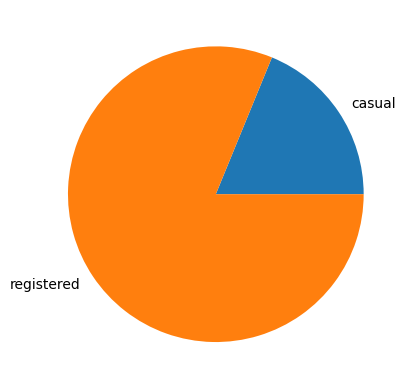

Casual: 392135
Registered: 1693341


In [ ]:
casual_counts = df['casual'].sum()
registered_counts = df['registered'].sum()

array = np.array([casual_counts, registered_counts])

# Plotting pie chart
plt.pie(array, labels=['casual', 'registered'])
plt.show()
print("Casual:", casual_counts)
print("Registered:", registered_counts)

In [ ]:

# Create labels for the bins
bins = [0, 15, 30, 46]
labels = ['0-15', '15-30', '30-46']

# Discretize 'temp' column into bins
df['temp_bins'] = pd.cut(df['atemp'], bins=bins, labels=labels, right=False)

# Sum counts of 'casual' and 'registered' within each bin
sum_counts = df.groupby('temp_bins')[['casual', 'registered']].sum()

# Display the sum of counts within each temperature bin
print(sum_counts)


           casual  registered
temp_bins                    
0-15        12884      162217
15-30      150948      811504
30-46      228303      719620


In [ ]:
#H0 : Temperature and count of user are independent
#H1 : Temperature and count of users are not independent

from scipy.stats import chi2_contingency

observed = [[12884,162217],
            [150948,811504],
            [228303,719620]]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed)

print("Chi-square Statistic:", chi_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", df)
print("Expected Frequencies:")
print(exp_freq)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Temperature and count of users are not independent ")
else:
    print("Fail to reject H0")
    print("Temperature and count of user are independent")

Chi-square Statistic: 38475.58164679177
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[ 32924.48852684 142176.51147316]
 [180971.2099396  781480.7900604 ]
 [178239.30153356 769683.69846644]]
Reject H0
Temperature and count of users are not independent 
